In [1]:
!pip install seaborn
!pip install -U scikit-learn
!pip install wandb

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 3108, in _dep_map
    return self.__dep_map
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 2901, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/base_command.py", line 169, in exc_logging_wrapper
    status = run_func(*args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/req_command.py", line 242, in wrapper
    return func(self, options, args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py", line 441, in run
    conflicts = self._determine_conflicts(to_install)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py", line 

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import wandb
import logging
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [5]:
# Login to Weights & Biases
!wandb login --relogin

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [32]:
#Global variables

# name of the input artifact
artifact_input_name = "divorce_kmeans/train.csv:latest"

# type of the artifact
artifact_type = "segregated_data"

# configure logging
logging.basicConfig(level=logging.INFO,
                    format="%(asctime)s %(message)s",
                    datefmt='%d-%m-%Y %H:%M:%S')

# reference for a logging obj
logger = logging.getLogger()

# initiate wandb project
run = wandb.init(project="divorce_kmeans", job_type="train_data")

logger.info("Downloading and reading artifact")
artifact = run.use_artifact(artifact_input_name)
artifact_path = artifact.file()
df = pd.read_csv(artifact_path)

In [21]:
df.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q46,Q47,Q48,Q49,Q50,Q51,Q52,Q53,Q54,Divorce
0,0,2,2,1,0,0,0,0,0,2,...,0,0,3,1,1,1,0,3,0,0
1,0,0,0,0,0,0,0,0,0,0,...,2,0,2,3,2,2,1,1,0,0
2,2,2,2,3,2,3,2,1,3,2,...,2,3,3,2,1,1,2,2,2,1
3,0,1,2,1,0,0,0,0,0,0,...,0,1,2,0,0,0,3,2,1,0
4,3,2,3,2,3,2,1,2,3,2,...,4,3,4,3,3,4,3,4,3,1


In [22]:
np.unique(df['Divorce'])

array([0, 1])

In [33]:
df.shape

(105, 55)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 55 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Q1       105 non-null    int64
 1   Q2       105 non-null    int64
 2   Q3       105 non-null    int64
 3   Q4       105 non-null    int64
 4   Q5       105 non-null    int64
 5   Q6       105 non-null    int64
 6   Q7       105 non-null    int64
 7   Q8       105 non-null    int64
 8   Q9       105 non-null    int64
 9   Q10      105 non-null    int64
 10  Q11      105 non-null    int64
 11  Q12      105 non-null    int64
 12  Q13      105 non-null    int64
 13  Q14      105 non-null    int64
 14  Q15      105 non-null    int64
 15  Q16      105 non-null    int64
 16  Q17      105 non-null    int64
 17  Q18      105 non-null    int64
 18  Q19      105 non-null    int64
 19  Q20      105 non-null    int64
 20  Q21      105 non-null    int64
 21  Q22      105 non-null    int64
 22  Q23      105 non-null    i

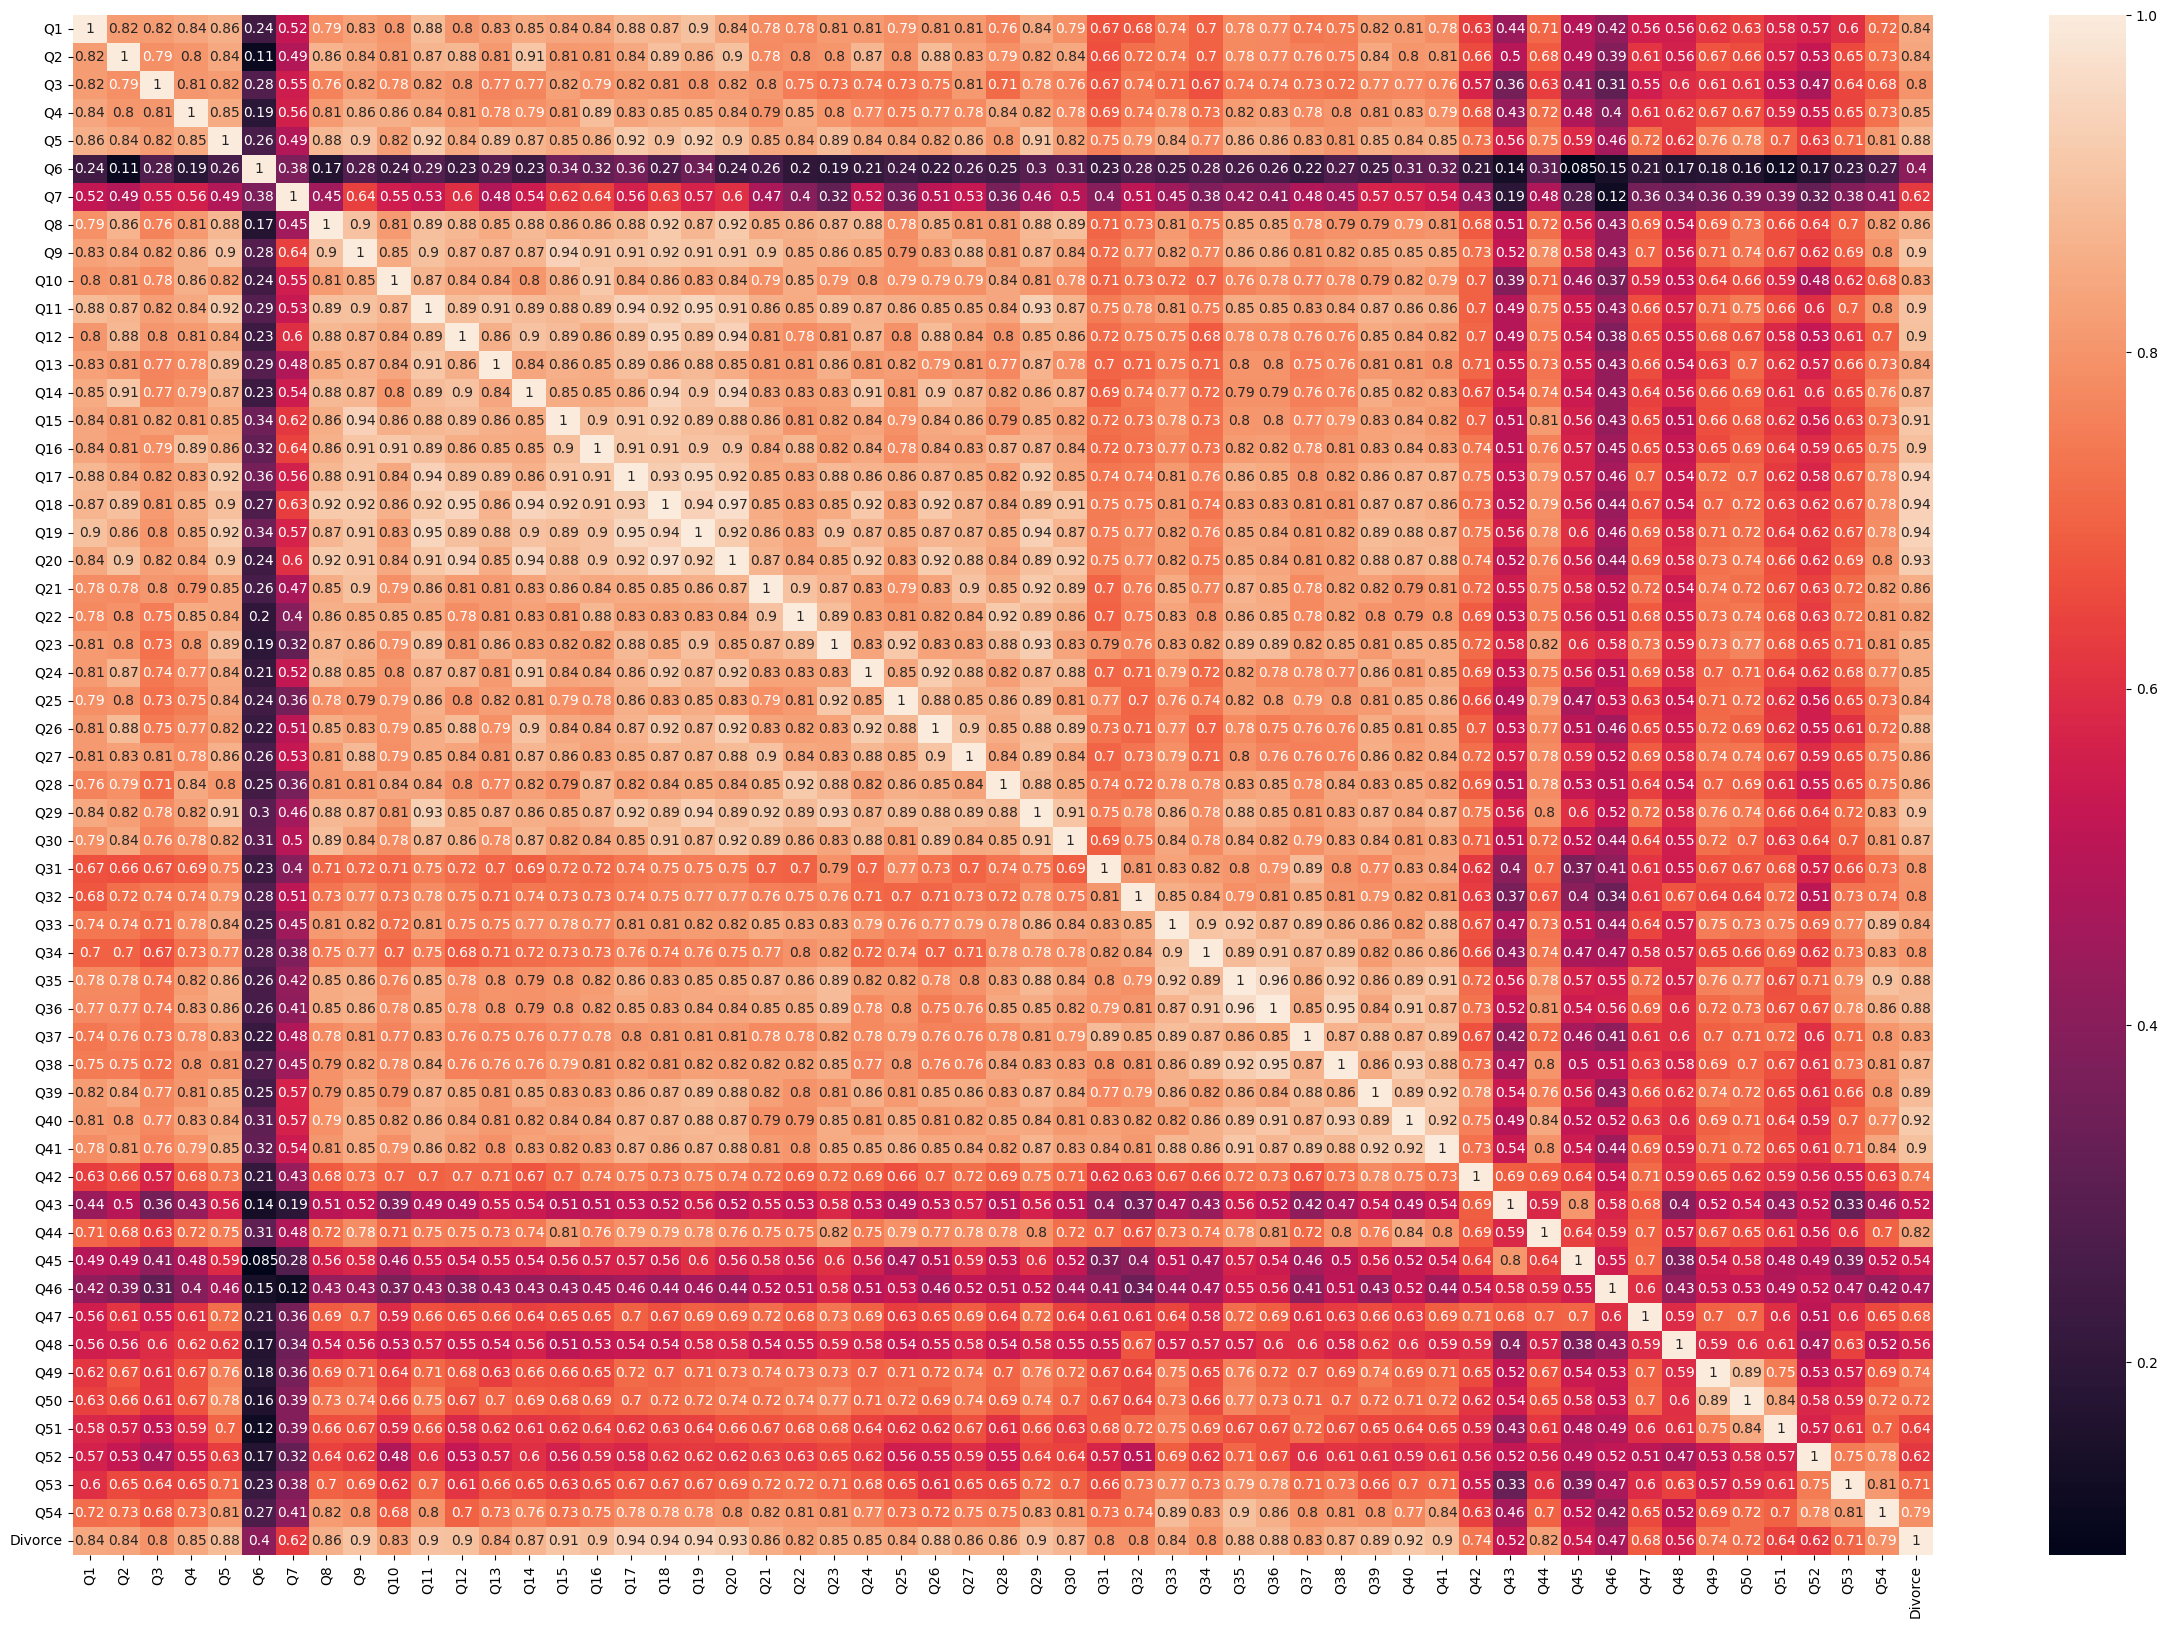

In [25]:
# Supondo que você já tenha calculado a matriz de correlação 'correl'
correl = df.corr()

# Define o tamanho do gráfico
plt.figure(figsize=(30, 20))

# Cria o heatmap com anotações
sns.heatmap(correl, annot=True)

# Mostra o gráfico
plt.show()

In [26]:
df.isnull().sum()

Q1         0
Q2         0
Q3         0
Q4         0
Q5         0
Q6         0
Q7         0
Q8         0
Q9         0
Q10        0
Q11        0
Q12        0
Q13        0
Q14        0
Q15        0
Q16        0
Q17        0
Q18        0
Q19        0
Q20        0
Q21        0
Q22        0
Q23        0
Q24        0
Q25        0
Q26        0
Q27        0
Q28        0
Q29        0
Q30        0
Q31        0
Q32        0
Q33        0
Q34        0
Q35        0
Q36        0
Q37        0
Q38        0
Q39        0
Q40        0
Q41        0
Q42        0
Q43        0
Q44        0
Q45        0
Q46        0
Q47        0
Q48        0
Q49        0
Q50        0
Q51        0
Q52        0
Q53        0
Q54        0
Divorce    0
dtype: int64

In [27]:
df

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q46,Q47,Q48,Q49,Q50,Q51,Q52,Q53,Q54,Divorce
0,0,2,2,1,0,0,0,0,0,2,...,0,0,3,1,1,1,0,3,0,0
1,0,0,0,0,0,0,0,0,0,0,...,2,0,2,3,2,2,1,1,0,0
2,2,2,2,3,2,3,2,1,3,2,...,2,3,3,2,1,1,2,2,2,1
3,0,1,2,1,0,0,0,0,0,0,...,0,1,2,0,0,0,3,2,1,0
4,3,2,3,2,3,2,1,2,3,2,...,4,3,4,3,3,4,3,4,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,3,3,3,4,3,1,1,3,3,4,...,4,3,4,3,3,4,3,4,3,1
101,0,0,0,0,0,2,0,0,0,1,...,2,1,3,1,1,1,1,1,0,0
102,0,0,0,0,0,0,0,0,0,0,...,3,0,2,3,2,2,4,1,1,0
103,0,0,0,0,0,0,0,0,0,1,...,1,2,3,2,2,2,1,1,0,0


In [34]:
logger.info("Outlier Removal")
# Temporary Variable
x = df.select_dtypes("int64").copy()

# identify outlier in the dataset
lof = LocalOutlierFactor()
outlier = lof.fit_predict(x)
mask = outlier != -1

In [35]:
df = df.loc[mask,:].copy()

In [30]:
df

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q46,Q47,Q48,Q49,Q50,Q51,Q52,Q53,Q54,Divorce
0,0,2,2,1,0,0,0,0,0,2,...,0,0,3,1,1,1,0,3,0,0
1,0,0,0,0,0,0,0,0,0,0,...,2,0,2,3,2,2,1,1,0,0
2,2,2,2,3,2,3,2,1,3,2,...,2,3,3,2,1,1,2,2,2,1
3,0,1,2,1,0,0,0,0,0,0,...,0,1,2,0,0,0,3,2,1,0
4,3,2,3,2,3,2,1,2,3,2,...,4,3,4,3,3,4,3,4,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,3,3,3,4,3,1,1,3,3,4,...,4,3,4,3,3,4,3,4,3,1
101,0,0,0,0,0,2,0,0,0,1,...,2,1,3,1,1,1,1,1,0,0
102,0,0,0,0,0,0,0,0,0,0,...,3,0,2,3,2,2,4,1,1,0
103,0,0,0,0,0,0,0,0,0,1,...,1,2,3,2,2,2,1,1,0,0


In [36]:
labels = df['Divorce']

data = df.iloc[:, :-1]



data = data.values
print(data.shape)

(96, 54)


In [37]:
data

array([[0, 2, 2, ..., 0, 3, 0],
       [0, 0, 0, ..., 1, 1, 0],
       [2, 2, 2, ..., 2, 2, 2],
       ...,
       [0, 0, 0, ..., 4, 1, 1],
       [0, 0, 0, ..., 1, 1, 0],
       [4, 4, 4, ..., 4, 3, 4]])

In [38]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10)
kmeans.fit(data)

KMeans(n_clusters=2, n_init=10)

In [39]:
import pickle
with open("model_kmeans.pkl", "wb") as f:
  pickle.dump(kmeans, f)

In [40]:
kmeans = kmeans.predict(data)
kmeans

array([0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1], dtype=int32)

In [41]:
accuracy = accuracy_score(labels.values, kmeans)
accuracy

0.9791666666666666

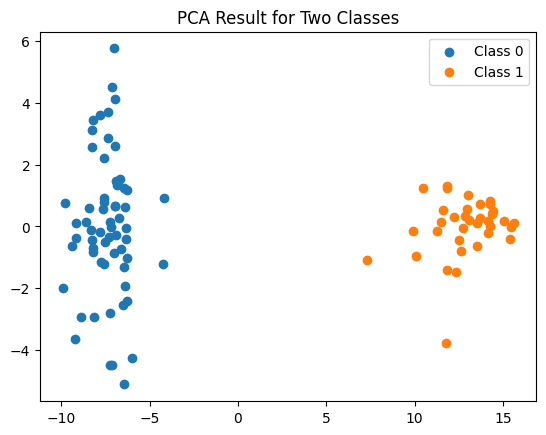

In [42]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2).fit(df)

pca_2d = pca.transform(df)


for label in set(labels):
    plt.scatter(pca_2d[kmeans == label, 0], pca_2d[kmeans == label, 1], label=f'Class {label}')

plt.title('PCA Result for Two Classes')
plt.legend()

plt.show()

In [ ]:
#send the raw_data.csv to the wandb storing it as an artifact
!wandb artifact put \
      --name divorce_kmeans/model_kmeans.pkl \
      --type model \
      --description "K-means Model for Divorce" model_kmeans.pkl

In [ ]:
# close the run
# waiting a while after run the previous cell before execute this
run.finish()